# Projet d'analyse des résultats des détections des exoplanètes par le télescope Kepler

Source : This file was produced by the NASA Exoplanet Archive  http://exoplanetarchive.ipac.caltech.edu
Tue Jan 23 10:50:14 2024

### Objectif :
A partir de la validité des résultats de détection des exoplanètes par le télescope Kepler obtenir un modèle de prédiction de la probabilité d'avoir un exoplanète sur une planète Terrestre.

### Prédictions sur les exoplanètes candidates



In [2]:
import os
from datetime import datetime

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import load_model, save_model
from tensorflow.keras import regularizers


In [4]:

# Charger ensemble de données ici (new_data par exemple)
new_data = pd.read_csv('./dataset/non_exoplanete_data.csv')
new_data.head()

,kepoi_name,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_smet,koi_smet_err1,koi_smet_err2,...,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err,koi_disposition
0,K00753.01,5853.0,158.0,-176.0,4.544,0.044,-0.176,-0.18,0.30,-0.30,...,0.070,0.042,0.072,0.002,0.071,-0.027,0.074,0.027,0.074,CANDIDATE
1,K00777.01,5446.0,179.0,-163.0,4.507,0.116,-0.105,-0.54,0.35,-0.30,...,0.076,0.057,0.077,-0.049,0.071,-0.021,0.075,0.053,0.072,CANDIDATE
2,K00780.02,5005.0,79.0,-79.0,4.595,0.012,-0.064,0.14,0.15,-0.15,...,0.640,0.710,0.540,0.080,0.450,-0.380,0.560,0.390,0.560,CANDIDATE
3,K00115.03,5779.0,104.0,-115.0,4.339,0.132,-0.108,-0.06,0.15,-0.15,...,0.950,0.050,0.930,-0.110,0.660,-0.300,1.000,0.300,1.000,CANDIDATE
4,K00797.01,5988.0,179.0,-197.0,4.541,0.048,-0.192,-0.52,0.30,-0.30,...,0.069,0.009,0.069,-0.062,0.070,0.060,0.072,0.087,0.072,CANDIDATE


In [9]:

# jeu de données
# Charger les noms des exoplanètes
exoplanet_names = X['kepoi_name']  # Remplacez 'chemin_vers_votre_fichier.csv' par le chemin réel de votre fichier
X = new_data.drop('koi_disposition', axis=1)
X = X.drop('kepoi_name', axis=1)

In [11]:

# Normalisation des caractéristiques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape des données pour convenir à l'entrée d'un CNN
X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)


Meilleur modèle

49/49 [==============================] - 1s 9ms/step
val_Accuracy: 0.9466580976863753


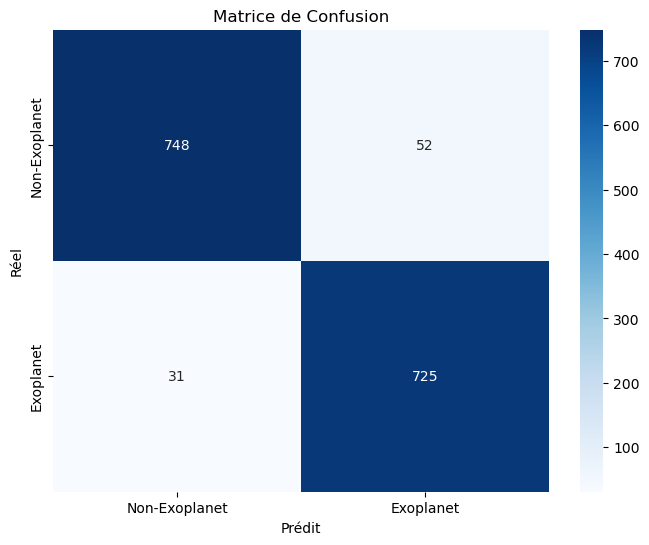

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       800
           1       0.93      0.96      0.95       756

    accuracy                           0.95      1556
   macro avg       0.95      0.95      0.95      1556
weighted avg       0.95      0.95      0.95      1556



In [ ]:
# Charger le meilleur modèle
best_modele_nom = "model5"

best_model = load_model('./models/best-'+best_modele_nom+".h5")

#accuracy
predicted_classes = best_model.predict(X_reshaped)
predicted_classes_binary = (predicted_classes > 0.5).astype(int)

results_df = pd.DataFrame({'kepoi_name': exoplanet_names, 'predicted_class': predicted_classes_binary.flatten()})

# Afficher les résultats
print(results_df)
